In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt

from model import optimize_beds

sns.set_theme(palette="rocket")

In [8]:
def graph_by_metrics(graph_metrics):
    # graph_metrics = pd.read_csv(f"analysis_per_blocks/metrics_by_block_{w1}_{w2}_{w3}.csv")
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(9, 9))
    fig.suptitle('Métricas durante el día')
    axes[0,0].set_title("Cambios por bloque")
    sns.lineplot(x="time", y="changes_per_block", data=graph_metrics, ax=axes[0, 0], linewidth=3)
    axes[1,1].set_title("Distancia por bloque")
    sns.lineplot(x="time", y="dist_per_block", data=graph_metrics, ax=axes[1, 1], linewidth=3)
    axes[0,1].set_title("Pacientes no ideales por bloque")
    sns.lineplot(x="time", y="not_ideals_per_block", data=graph_metrics, ax=axes[0, 1], linewidth=3)
    axes[1,0].set_title("Pacientes por bloque")
    sns.lineplot(x="time", y="patients_per_block", data=graph_metrics, ax=axes[1, 0], linewidth=3)

In [9]:
def graph_by_weights(w1, w2, w3, w4):
    graph_metrics = pd.read_csv(f"analysis_per_blocks/metrics_by_block_{w1}_{w2}_{w3}.csv")
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(9, 9))
    fig.suptitle('Métricas durante el día')
    axes[0,0].set_title("Cambios por bloque")
    sns.lineplot(x="time", y="changes_per_block", data=graph_metrics, ax=axes[0, 0], linewidth=3)
    axes[1,1].set_title("Distancia por bloque")
    sns.lineplot(x="time", y="dist_per_block", data=graph_metrics, ax=axes[1, 1], linewidth=3)
    axes[0,1].set_title("Pacientes no ideales por bloque")
    sns.lineplot(x="time", y="not_ideals_per_block", data=graph_metrics, ax=axes[0, 1], linewidth=3)
    axes[1,0].set_title("Pacientes por bloque")
    sns.lineplot(x="time", y="patients_per_block", data=graph_metrics, ax=axes[1, 0], linewidth=3)

{'total_distance': 9935, 'beds_changed': 12, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 81.0, 'objective_3': 108.0, 'objective_4': 12.0}


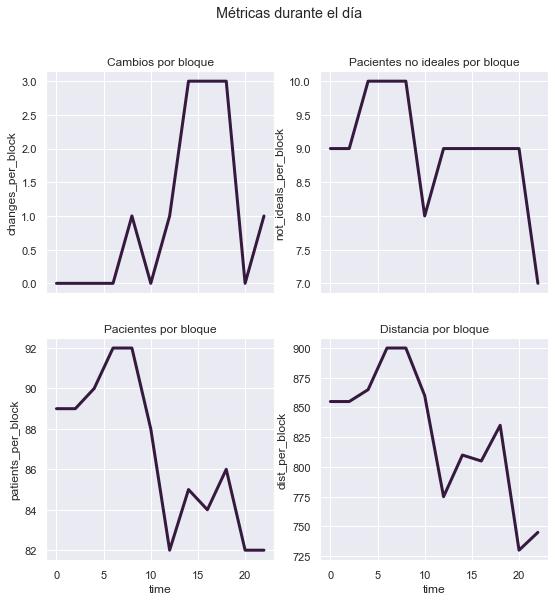

In [12]:
# Caso bonito
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20, 35])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

In [ ]:
# Caso 
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20, 35])
print(general_metrics)

In [ ]:
w2 -> 1, 10, 2 # 5
w3 -> 15, 25, 5 # 4
w4 -> 30, 40, 2 # 5

{'total_distance': 9935, 'beds_changed': 2, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 11.0, 'objective_3': 108.0, 'objective_4': 2.0}
{'total_distance': 9935, 'beds_changed': 20, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 131.0, 'objective_3': 108.0, 'objective_4': 20.0}


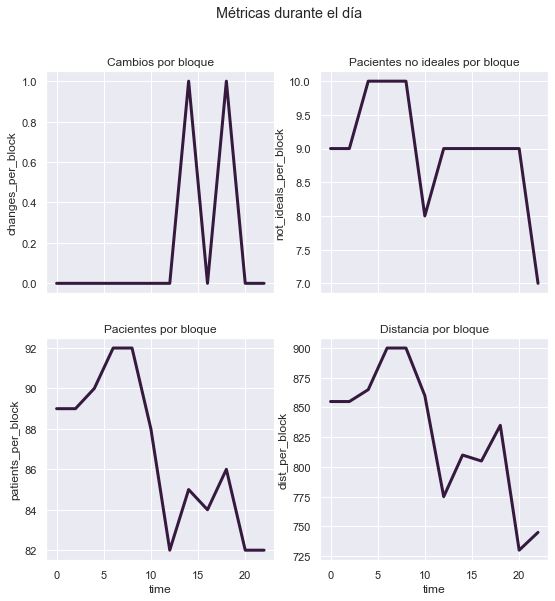

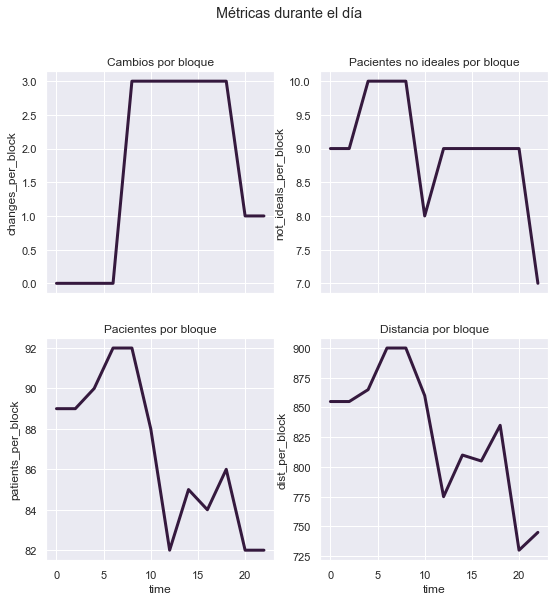

In [13]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 1, 20, 35])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 10, 20, 35])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

{'total_distance': 9335, 'beds_changed': 11, 'not_ideal': 145, 'status': 2, 'objective_1': 9335.0, 'objective_2': 66.0, 'objective_3': 145.0, 'objective_4': 11.0}
{'total_distance': 9935, 'beds_changed': 9, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 60.0, 'objective_3': 108.0, 'objective_4': 9.0}


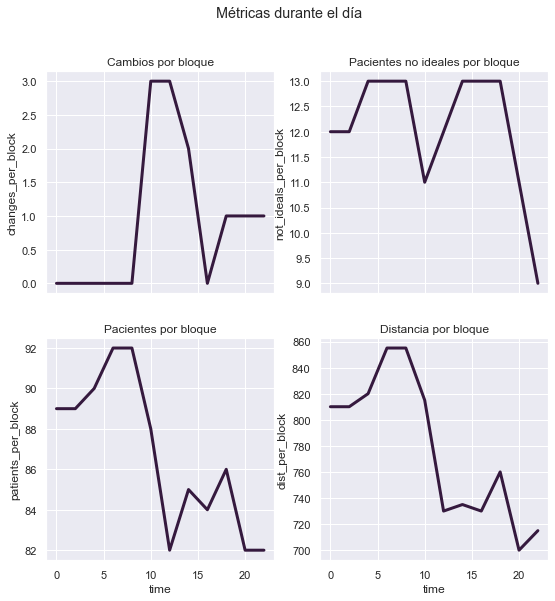

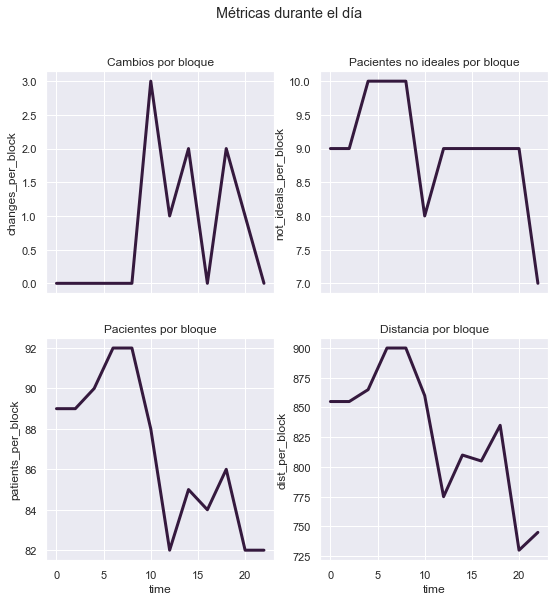

In [14]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 15, 35])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 25, 35])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

{'total_distance': 9935, 'beds_changed': 19, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 126.0, 'objective_3': 108.0, 'objective_4': 19.0}
{'total_distance': 9935, 'beds_changed': 2, 'not_ideal': 108, 'status': 2, 'objective_1': 9935.0, 'objective_2': 11.0, 'objective_3': 108.0, 'objective_4': 2.0}


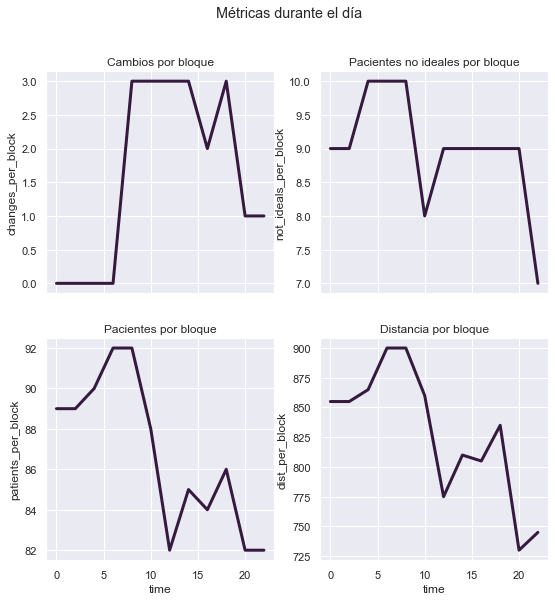

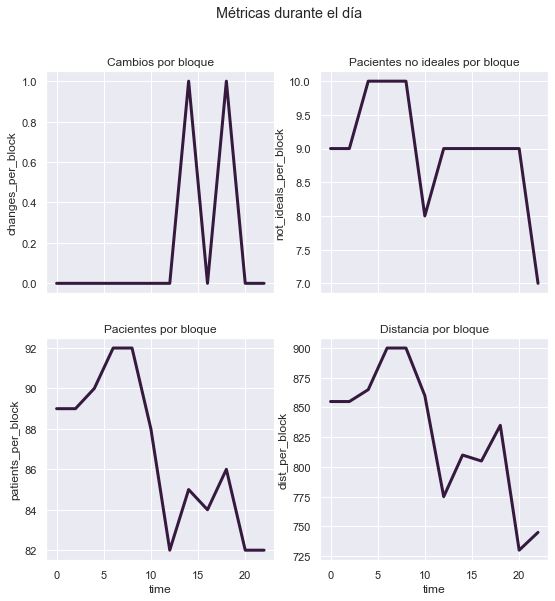

In [16]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20, 30])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20, 40])
print(general_metrics)
graphic_by_metrics(metrics_by_block)

In [2]:
# w2 -> 1, 12, 2 # 5
# w3 -> 10, 31, 5 # 4
# w4 -> 31, 42, 2 # 5
# 21 iteraciones, esperar para ver resultados
w1 = 1
all_metrics = []
for w2 in range(1, 12, 2):
    for w3 in range(10, 31, 5):
        for w4 in range(31, 42, 2):
            general_metrics, metrics_by_block = optimize_beds(130, 100, [w1, w2, w3, w4])
            total_distance = general_metrics["total_distance"]
            beds_changed = general_metrics["beds_changed"]
            not_ideal = general_metrics["not_ideal"]
            print(f"w1: {w1}, w2: {w2}, w3: {w3}, w4: {w4}, {total_distance = }, {beds_changed = }, {not_ideal = }")
            general_metrics.update({"w1": w1, "w2": w2, "w3": w3, "w4": w4})
            all_metrics.append(general_metrics)
            if metrics_by_block is not None:
                metrics_by_block.to_csv(f"analysis_4_blocks/metrics_by_block_{w1}_{w2}_{w3}_{w4}.csv")
            print()

metrics = pd.DataFrame(all_metrics)
metrics.to_csv("cost_4_analysis.csv")

w1: 1, w2: 1, w3: 10, w4: 31, total_distance = 8635, beds_changed = 2, not_ideal = 200

w1: 1, w2: 1, w3: 10, w4: 33, total_distance = 8645, beds_changed = 1, not_ideal = 202

w1: 1, w2: 1, w3: 10, w4: 35, total_distance = 8525, beds_changed = 1, not_ideal = 214

w1: 1, w2: 1, w3: 10, w4: 37, total_distance = 8645, beds_changed = 1, not_ideal = 202

w1: 1, w2: 1, w3: 10, w4: 39, total_distance = 8765, beds_changed = 1, not_ideal = 190

w1: 1, w2: 1, w3: 10, w4: 41, total_distance = 8645, beds_changed = 1, not_ideal = 202

w1: 1, w2: 1, w3: 15, w4: 31, total_distance = 9220, beds_changed = 2, not_ideal = 154

w1: 1, w2: 1, w3: 15, w4: 33, total_distance = 9145, beds_changed = 2, not_ideal = 159

w1: 1, w2: 1, w3: 15, w4: 35, total_distance = 9220, beds_changed = 2, not_ideal = 154

w1: 1, w2: 1, w3: 15, w4: 37, total_distance = 9400, beds_changed = 2, not_ideal = 142

w1: 1, w2: 1, w3: 15, w4: 39, total_distance = 8995, beds_changed = 2, not_ideal = 169

w1: 1, w2: 1, w3: 15, w4: 41, to